<a href="https://colab.research.google.com/github/gitnicolas343/intro_neurociencias_Computacionesles_phyton/blob/main/Sadi_Nicolas_Mendoza_Soriano_Lab6_Mas_alla_del_tonico_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Más allá del disparo tónico

## Ejercicio 1

Una de las características interesantes de algunas céulas es la capacidad de generar los llamados *bursts* de actividad. Una secuencia rápida de trenes de spikes, seguido de un periodo sin actividad. A continuación su colega biólogo le presenta un experimento que ha hecho en el que ha encontrado bursting en una neurona marca pasos.

Este le pide que le ayude a hacer el análisis de sus datos.

1. Cargue los datos y grafique el potencial del membrana de la neurona registrada en este experimento

In [ ]:
!pip install pyabf --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
# TODO
import pyabf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,periodogram


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
abf = pyabf.ABF('/content/drive/MyDrive/NEURO CIENCIAS/STG_PD_Bursts.abf')
abf

ABF (v2.9) with 1 channel (mV), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 1.00 minutes, recorded with protocol "Intra3 Extra8  pH Tmp". path=/content/drive/MyDrive/NEURO CIENCIAS/STG_PD_Bursts.abf

In [ ]:
#extraccion de iformacion
abf.setSweep(0)
tiempo = abf.sweepX
voltaje = abf.sweepY
corriente = abf.sweepC

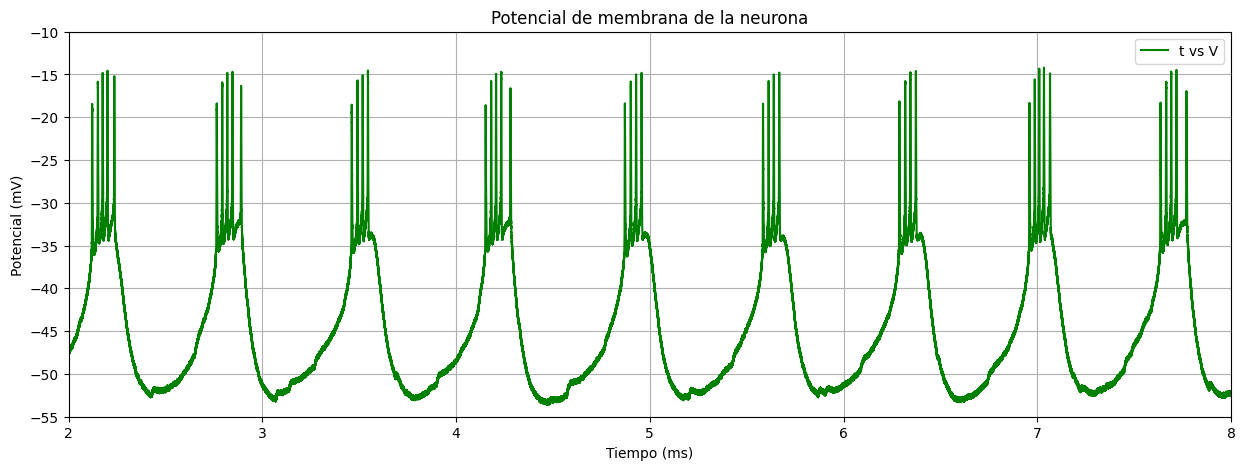

In [ ]:
#grafica  potencial de menbrana

plt.figure(figsize = (15, 5))


plt.title('Potencial de membrana de la neurona')
plt.plot(tiempo, voltaje, color = 'g', label = 't vs V')

plt.legend()
plt.xlim(2,8)
plt.ylim(-55,-10)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial (mV)')
plt.grid()
plt.show()

2. Identifique los spikes y grafíquelos encima de la gráfica anterior. Dado que la señal puede poseer ruido que haga aparecer pico espurios, verifique cómo el argumento *prominence* y *distance* de la función find_peaks puede ayudarle

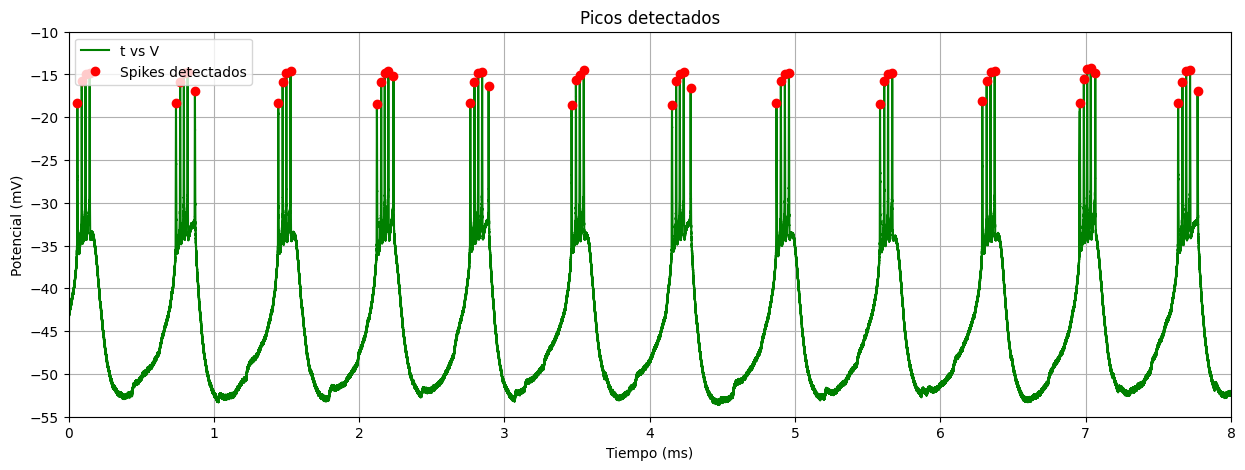

In [ ]:
# TODO

#de laboratorios anteriores
peaks, _ = find_peaks(voltaje, prominence=10, distance=100)
tiempo_peaks = tiempo[peaks]
voltaje_peaks = voltaje[peaks]

plt.figure(figsize = (15, 5))
plt.title('Picos detectados')
plt.plot(tiempo, voltaje, color = 'g', label = 't vs V')
plt.plot(tiempo_peaks, voltaje_peaks,'ro', label="Spikes detectados")
plt.xlim(0,8)
plt.ylim(-55,-10)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial (mV)')
plt.legend()
plt.grid()
plt.show()

3. Haga el siguiente análisis de la señal:
    - Calcule el histograma del ISI.
    - Cuál es la frecuencia de disparo intra-burst?
    - Cuál es el tiempo promedio inter-burst?
    - Calcule el Coeficiente de Variación del ISI.
$CV(ISI) = \frac{\sigma(ISI)}{\langle ISI \rangle}$

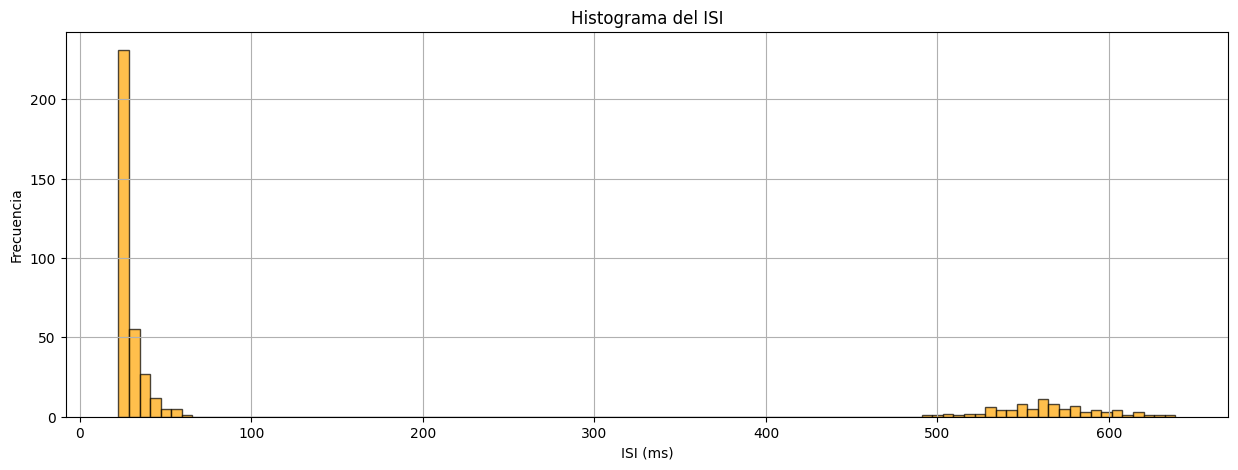

In [ ]:
# TODO

#del aboratorio anterior
isi = np.diff(tiempo_peaks)*1000
plt.figure(figsize = (15, 5))
plt.title('Histograma del ISI')
plt.hist(isi, bins=100, color='orange', alpha=0.7,edgecolor='black')
plt.xlabel('ISI (ms)')

plt.ylabel('Frecuencia')
plt.grid()

In [ ]:
#para calcular la frecuencia intra - burst , es decir el tiempo entre rafagas de  disparos
#viendo dentro de  tiempo de picos veo que hay picos consecutivos, entonces puedo recorrer la lista que use con np.diff() para
#ver las diferencias e identificar los grupos de spikes

#hare un experimento, en la grafica de potencial de membrana hay 10 spikes en 2 ms  entonces mirare un intervalo corto para ver
#cuanto es mas o menos la diferencia
umbral = 100

#mas o menos una diferencia de 100 para encontrar spikes consecutivos, ya que si vemos en la lista hay saltos de tiempo de <500 ms
#usare este umbral



In [ ]:
burst = list()             #voy a guardar listas de listas con el index de numero de burst que se tiene
current_group = [0]        #aqui voy a generar los grupos

for i in range(len(isi)): #como isi tiene np.diff me dice el tiempo de diferencia entre spike, voy a iterar sobre la longitud
    if isi[i] <= umbral:  #de arrego de isi  y a cada valor la asocio un spike, lo consulto y si no esta en mas abajo del umbral es porque
                          # no corresponde a la rafaga
        current_group.append(i+1)   #aqui voy generando los grupos con la "indexacion"  de los spikes

    else:                           #Cuando un tiempo no cae en el umbral se infiere que que la refaga acabo y es un periodo de
        burst.append(current_group) #silencio, agrego el grupo actual a la lista de lista de bust
        current_group = [i+1]       #paso al siguiente


burst.append(current_group)         #agrego el ultimo grupo


sumadif = 0
cont = 0

for grupo in burst:                            #lista con los index
    if len(grupo) >= 2:                        #si la hay menos de 2 spikes no vale la pena contarñp
        for j in range(1,len(grupo)):
            t1 = grupo[j]
            t2 =  grupo[j-1]
            diferencias = tiempo_peaks[t1]-tiempo_peaks[t2]      #diferencia entre el spike anterior y el actual
            sumadif += diferencias                               #sima de las diferencias
            cont += 1                                            #control de lo que se ha sumado


promedio_ms = (sumadif / cont) * 1000  # promedio en milisegundos
frecuencia_hz = 1000 / promedio_ms     # Hz



print(f'frecuencia intra_burst: {frecuencia_hz}')


frecuencia intra_burst: 34.23261879533779


In [ ]:
inter_burst_intervals = list()                                                   #lista para los intervalos
tiempos_bust = list()
for i in range(1, len(burst)):                                                   #iteracion sobre burst , con el fin de odtener los incdices
    inicio = tiempo_peaks[burst[i][0]]                                           # primer spike
    fin = tiempo_peaks[burst[i-1][-1]]                                           #ultimo spike
    inter_burst_intervals.append((inicio - fin) * 1000)                         #agrego a los intervalos

promedio_interburst = np.mean(inter_burst_intervals)                             #promedio de los intervalos

print(f'promedio inter-burst:{promedio_interburst}')

promedio inter-burst:564.2477272727272


In [ ]:
cv_isi = np.std(isi) / np.mean(isi)
print(f'CV: {cv_isi}')

CV: 1.5507122230063644


4. Extraiga el tren de spikes dividiendo el tiempo del experimento en intervalos de tiempo $\Delta t = 20$ms y poniendo un 1 en los intervalos donde hay spikes y 0 donde no los hay y calcule
    - La función de autocorrelación del tren de spikes
    - Le densidad de potencia espectral

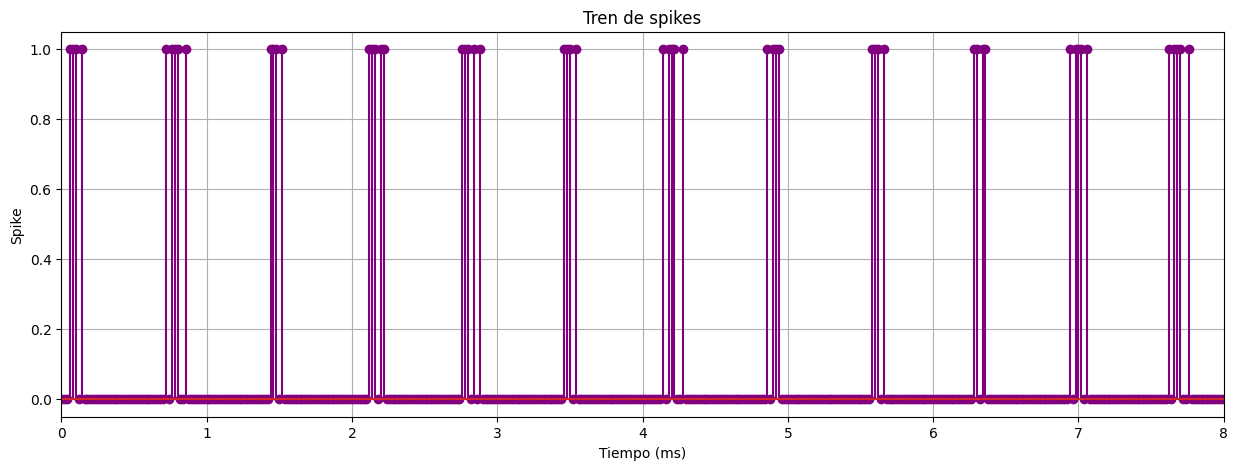

In [ ]:
# TODO

bins = np.arange(0,tiempo[-1],0.02)  #dividi el tiempo en intervalos de 0.02

spikexgrupo = list()                 #spikes por grupo, aqui guarlos tiempos de los grupos que calcule en la lista de listas anterior
spikes_01 = list()                   #espikes con 1 o 0 dado el caso

for spike in burst:                                        #aqui junto todas las litas de listas de los burst
    spikexgrupo = spikexgrupo + list(tiempo_peaks[spike])  #las pego un al lado de otra


for bin_inicio in bins:               #ciclo que identifica los spikes que caen entre cada intervalo
    spike_en_bin = 0                  #aqui inicializo la variable asumiendo que no esta en el iltervalo
    for spike in spikexgrupo:         #itero sobre los spikes
        if bin_inicio <= spike < (bin_inicio + 0.02):  #identifico si pertenece al intervalo
            spike_en_bin = 1                           #si es asi  es 1
            break                                      #termino ciclo sino se agregan mas numeros de los esperados
    spikes_01.append(spike_en_bin)                    #agrego a la lista de spikes


#figura
plt.figure(figsize = (15, 5))
plt.stem(bins,spikes_01, 'purple')
plt.xlim(0,8)
plt.title('Tren de spikes')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Spike')
plt.grid()
plt.show()

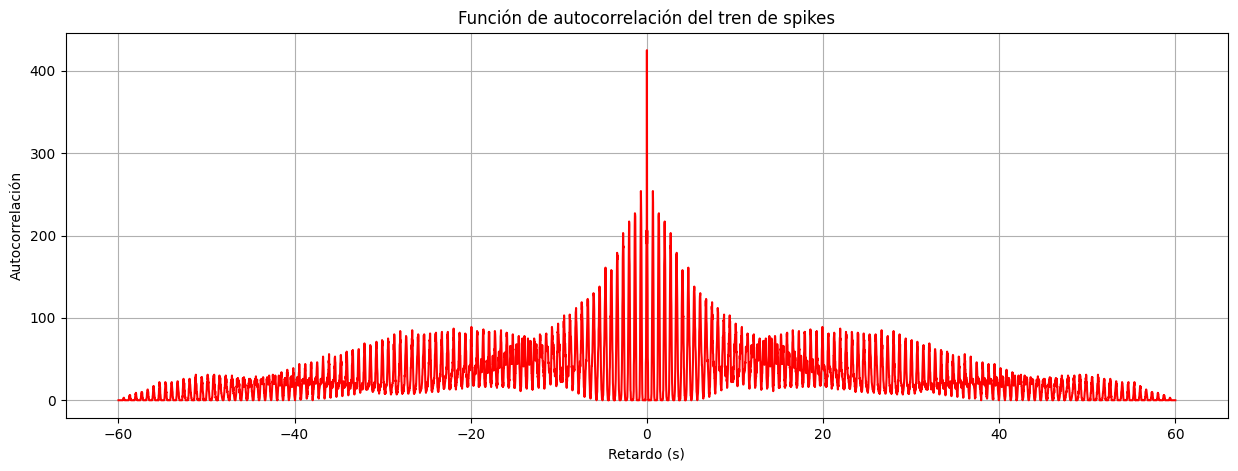

In [ ]:
soikes_corr = np.array(spikes_01)  #correlacion - media del tren de spikes

correlacion = np.correlate(soikes_corr, soikes_corr, mode = 'full')  #correlacion con numpy usando el argumento full para todos los intervalos
                                                                     #de tiempo

#GRAFICA
plt.figure(figsize=(15, 5))
plt.title('Función de autocorrelación del tren de spikes')
plt.plot(np.arange(-len(spikes_01)+1, len(spikes_01)) * 0.02, correlacion, color='red')
plt.xlabel('Retardo (s)')
plt.ylabel('Autocorrelación')

plt.grid()
plt.show()

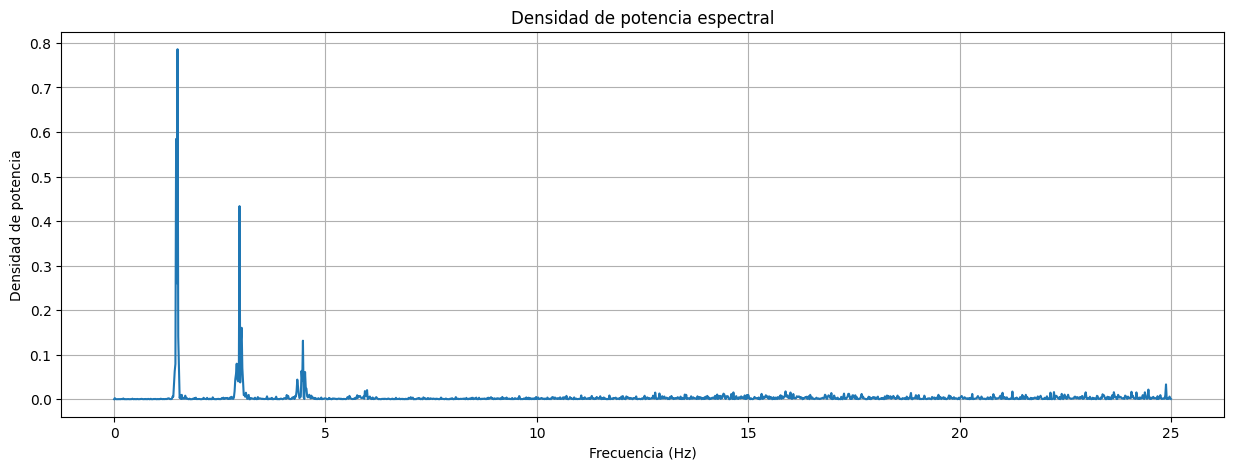

In [ ]:
fs = 1/0.02                #frecuencia

f, Pxx = periodogram(soikes_corr, fs = fs)   #densidad de frecuencia usando periodogram

#GRAFICA
plt.figure(figsize=(15, 5))
plt.title('Densidad de potencia espectral')
plt.plot(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia')

plt.grid()
plt.show()

## Ejercicio 2

La siguiente tabla muestra los parámetros usados en el modelo AdEx para obtener diferentes patrones de disparo. Implemente los diferentes casos mostrando para cada uno la serie de tiempo del potencial de membrana así como el histograma del ISI, la función de autocorrelación del spike train y la densidad de potencia espectral.

Para todos los casos $\Delta_{T} = 2$, $V_{rh} = -50$.

- Adaptación: $\tau_m = 16.66$, $a = 2$, $b = 60$, $\tau_w = 300$, $R = 1/12$, $V_{rest} = -70$, $V_{reset} = -58$, $I=500$

- Bursting Regular: $\tau_m = 20$, $a = 2$, $b = 100$, $\tau_w = 120$, $R = 1/10$, $V_{rest} = -58$, $V_{reset} = -46$, $I=210$

- Burst Inicial: $\tau_m = 7.22$, $a = 4$, $b = 120$, $\tau_w = 150$, $R = 1/18$, $V_{rest} = -58$, $V_{reset} = -50$, $I=400$

- Irregular: $\tau_m = 8.33$, $a = -11$, $b = 30$, $\tau_w = 130$, $R = 1/12$, $V_{rest} = -60$, $V_{reset} = -48$, $I=160$

In [ ]:
#funcion  que me facilita el calculo del ADEX

def adex(tau_m,a,b,tau_w,R,V_rest,V_reset,I,tf):
    #parametros generales
    delta_T = 2
    Vrh =    -50
    #listas donde se alamcenan las variables
    V = [-50]
    W = [0]
    spikess = list()
    #configuracion del metodo de euler
    t = [0]
    h = 0.01
    n = int(tf/h)

    #metodo de euleradaptado a adex

    for i in range(n):
        Vold = V[-1]
        wold = W[-1]
        told = t[-1]


        Vnew = Vold + h*(-(Vold - V_rest) + delta_T * np.exp((Vold - Vrh)/delta_T) - R*wold + R*I) / tau_m
        wnew = wold + h*(a*(Vold - V_rest)- wold)/tau_w
        tnew = told + h

        if Vnew >= 0:

            Vnew = V_reset
            wnew += b
            spikess.append(tnew)

        V.append(Vnew)
        W.append(wnew)
        t.append(tnew)



    return V,W,t,spikess

def peaks_01_ADEX(tiempo_peaks_adex,tf):

    bins_adex = np.arange(0,tf,0.01)  #dividi el tiempo en intervalos de 0.02

    spikes_01_adex = list()                   #espikes con 1 o 0 dado el caso


    for bin_inicio in bins_adex:                           #ciclo que identifica los spikes que caen entre cada intervalo
        spike_en_bin = 0                                   #aqui inicializo la variable asumiendo que no esta en el iltervalo
        for spike in tiempo_peaks_adex:                    #itero sobre los spikes
            if bin_inicio <= spike < (bin_inicio + 0.02):  #identifico si pertenece al intervalo
                spike_en_bin = 1                           #si es asi  es 1
                break                                      #termino ciclo sino se agregan mas numeros de los esperados
        spikes_01_adex.append(spike_en_bin)                #agrego a la lista de spikes
    return spikes_01_adex


In [ ]:
#adaptacion

#parametros
tau_m = 16.66
a = 2
b = 60
tau_w = 300
R = 1/12
V_rest = -70
V_reset = -58
I = 500
tf = 3000


V, W, t, spike_times_1 = adex(tau_m, a, b, tau_w, R, V_rest, V_reset, I, tf)
isi_adaptacion = np.diff(np.array(spike_times_1))
peaks_01_adaptacion = peaks_01_ADEX(spike_times_1,tf)
bins_uso = np.arange(0,tf,0.02)
correlacion_adaptacion = np.correlate(peaks_01_adaptacion, peaks_01_adaptacion, mode = 'full')
f , Pxx_adaptacion= periodogram(peaks_01_adaptacion, fs = 1/0.02)




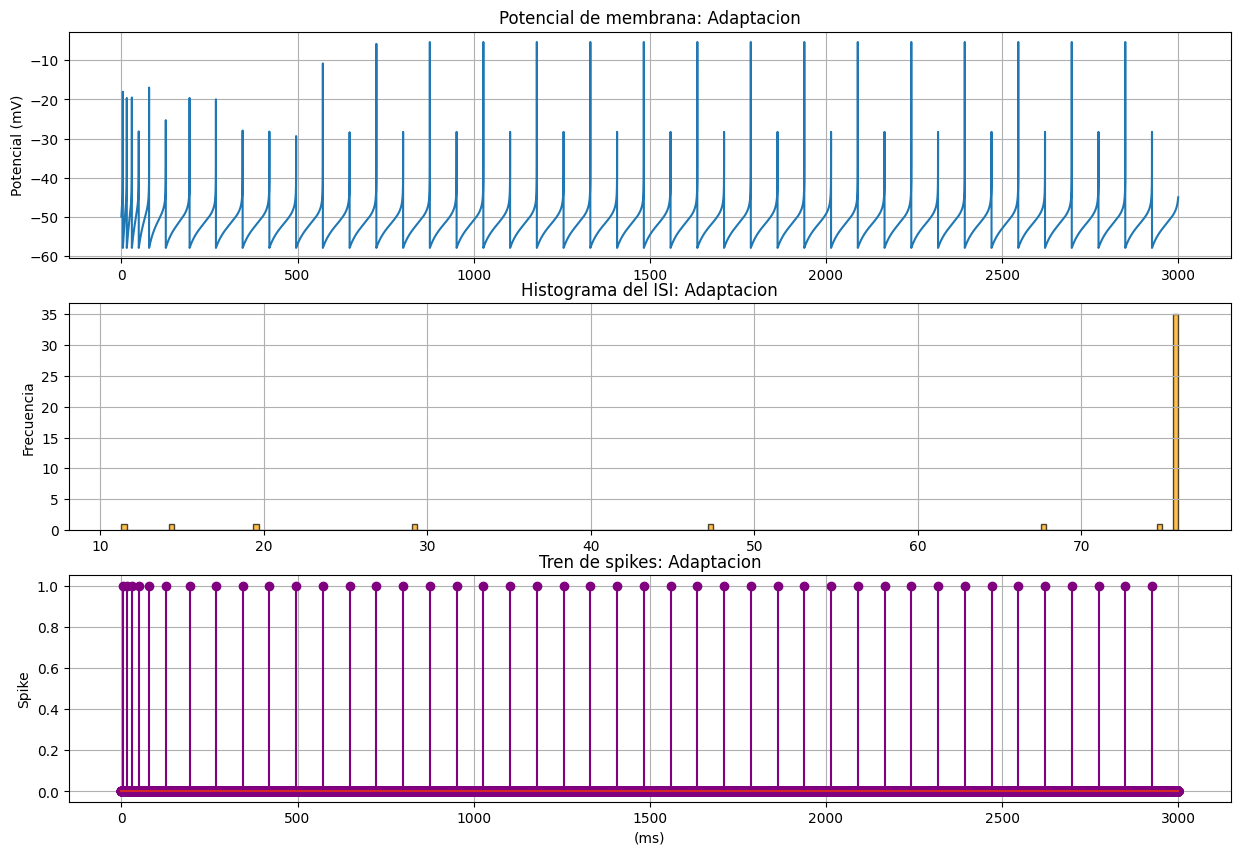

In [ ]:

plt.figure(figsize = (15, 10))
plt.subplot(3,1,1)
plt.plot(t,V)

plt.title('Potencial de membrana: Adaptacion')
plt.ylabel('Potencial (mV)')
plt.grid()


plt.subplot(3,1,2)
plt.hist(isi_adaptacion, bins=200, color='orange', alpha=0.7,edgecolor='black')
plt.title('Histograma del ISI: Adaptacion')
plt.ylabel('Frecuencia')
plt.grid()

plt.subplot(3,1,3)
plt.stem(bins_uso,peaks_01_adaptacion, 'purple')
plt.title('Tren de spikes: Adaptacion')
plt.ylabel('Spike')
plt.xlabel('(ms)')
plt.grid()
plt.show()


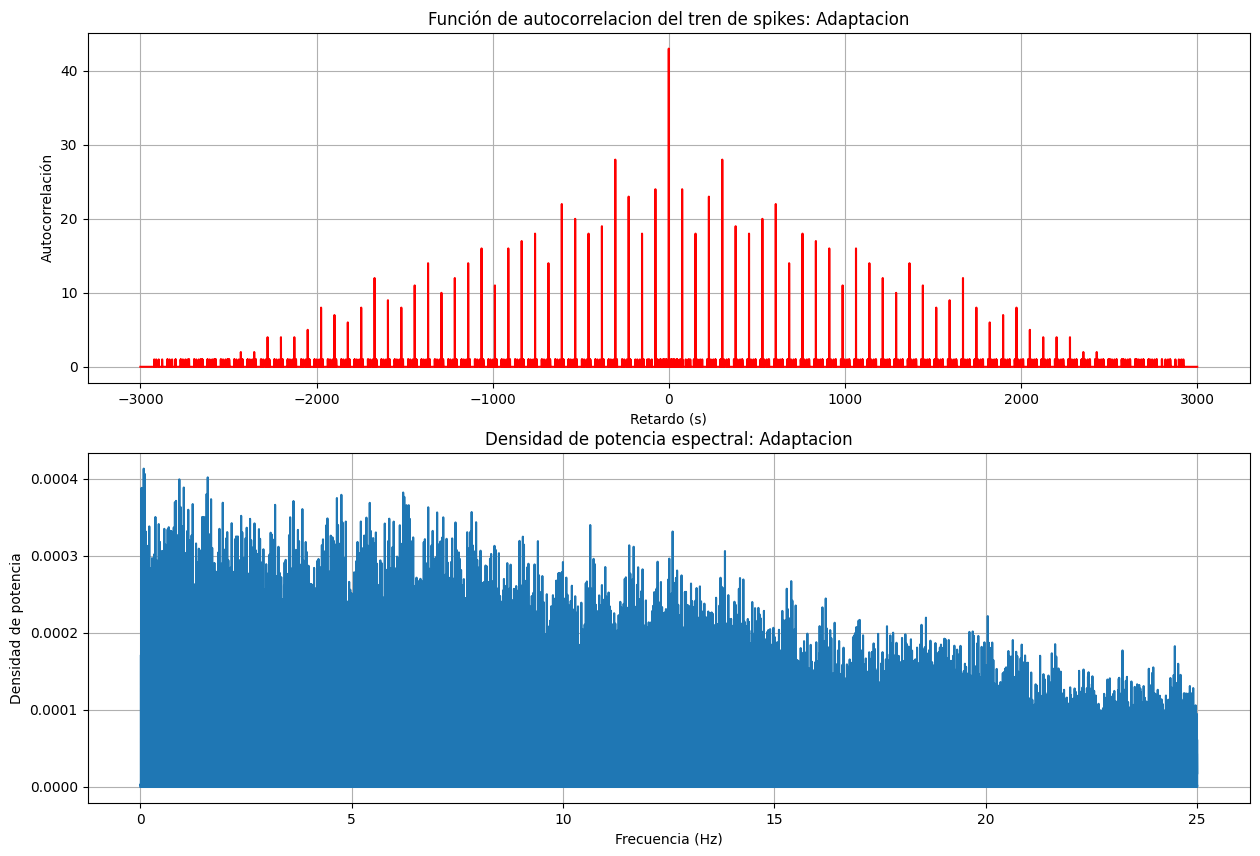

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(np.arange(-len(peaks_01_adaptacion) + 1, len(peaks_01_adaptacion)) * 0.02, correlacion_adaptacion , color='red')

plt.title('Función de autocorrelacion del tren de spikes: Adaptacion')
plt.xlabel('Retardo (s)')
plt.ylabel('Autocorrelación')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f, Pxx_adaptacion)
plt.title('Densidad de potencia espectral: Adaptacion')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia')

plt.grid()

In [ ]:
#Bursting Regular:  τm=20 ,  a=2 ,  b=100 ,  τw=120 ,  R=1/10 ,  Vrest=−58 ,  Vreset=−46 ,  I=210

tau_mb = 20
ab = 2
b = 100
tau_wb = 120
Rb = 1/10
V_restb = -58
V_resetb = -46
Ib = 210
tfb = 3000

Vb,Wb,tb,spike_timesb = adex(tau_mb, ab, b, tau_wb, Rb, V_restb, V_resetb, Ib, tfb)
isib = np.diff(np.array(spike_timesb))
peaks_01b = peaks_01_ADEX(spike_timesb,tfb)
bins_uso = np.arange(0,tfb,0.02)
correlacionb = np.correlate(peaks_01b, peaks_01b, mode = 'full')
f , Pxxb= periodogram(peaks_01b, fs = 1/0.02)


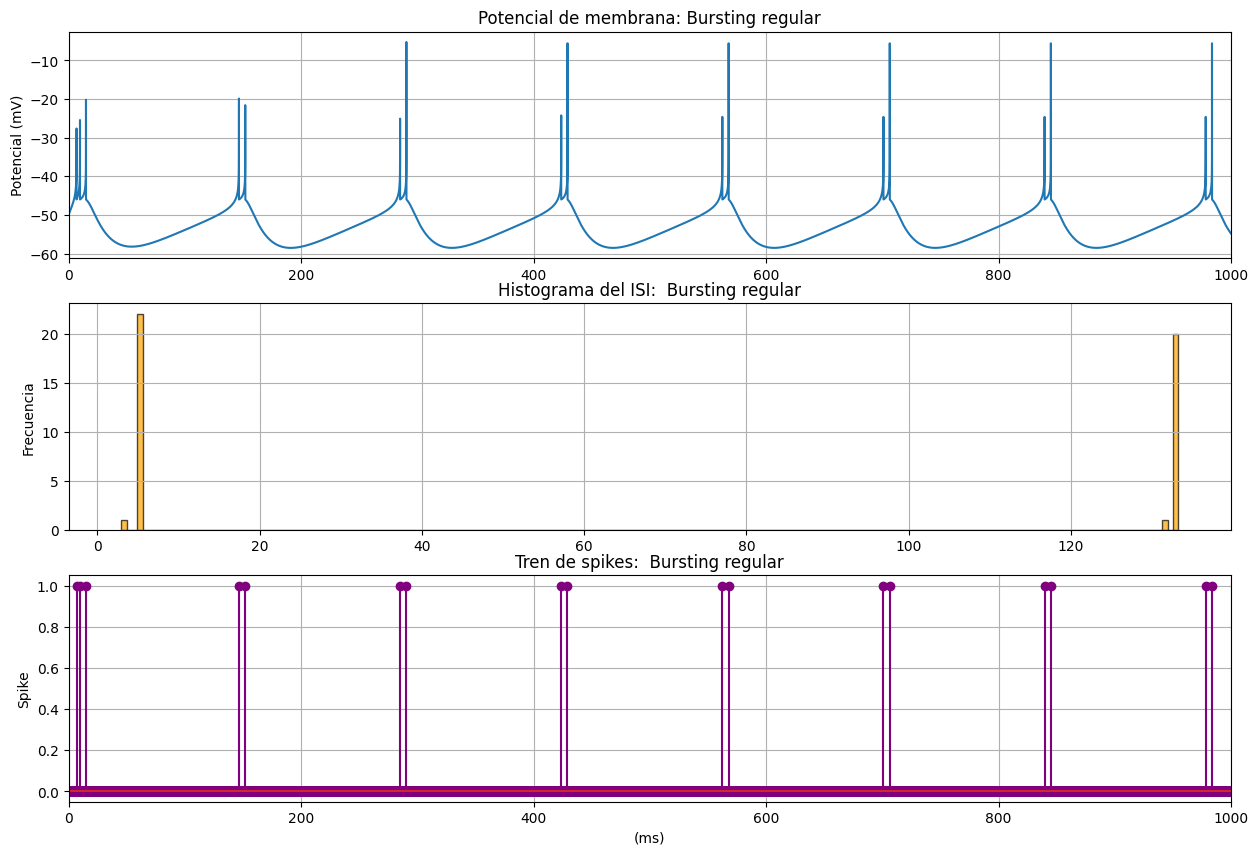

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(3,1,1)
plt.plot(tb,Vb)
plt.xlim(0,1000)

plt.title('Potencial de membrana: Bursting regular')
plt.ylabel('Potencial (mV)')

plt.grid()

plt.subplot(3,1,2)
plt.hist(isib, bins=200, color='orange', alpha=0.7,edgecolor='black')

plt.title('Histograma del ISI:  Bursting regular')

plt.ylabel('Frecuencia')
plt.grid()

plt.subplot(3,1,3)
plt.stem(bins_uso,peaks_01b, 'purple')

plt.title('Tren de spikes:  Bursting regular')
plt.ylabel('Spike')
plt.xlabel('(ms)')
plt.xlim(0,1000)
plt.grid()
plt.show()



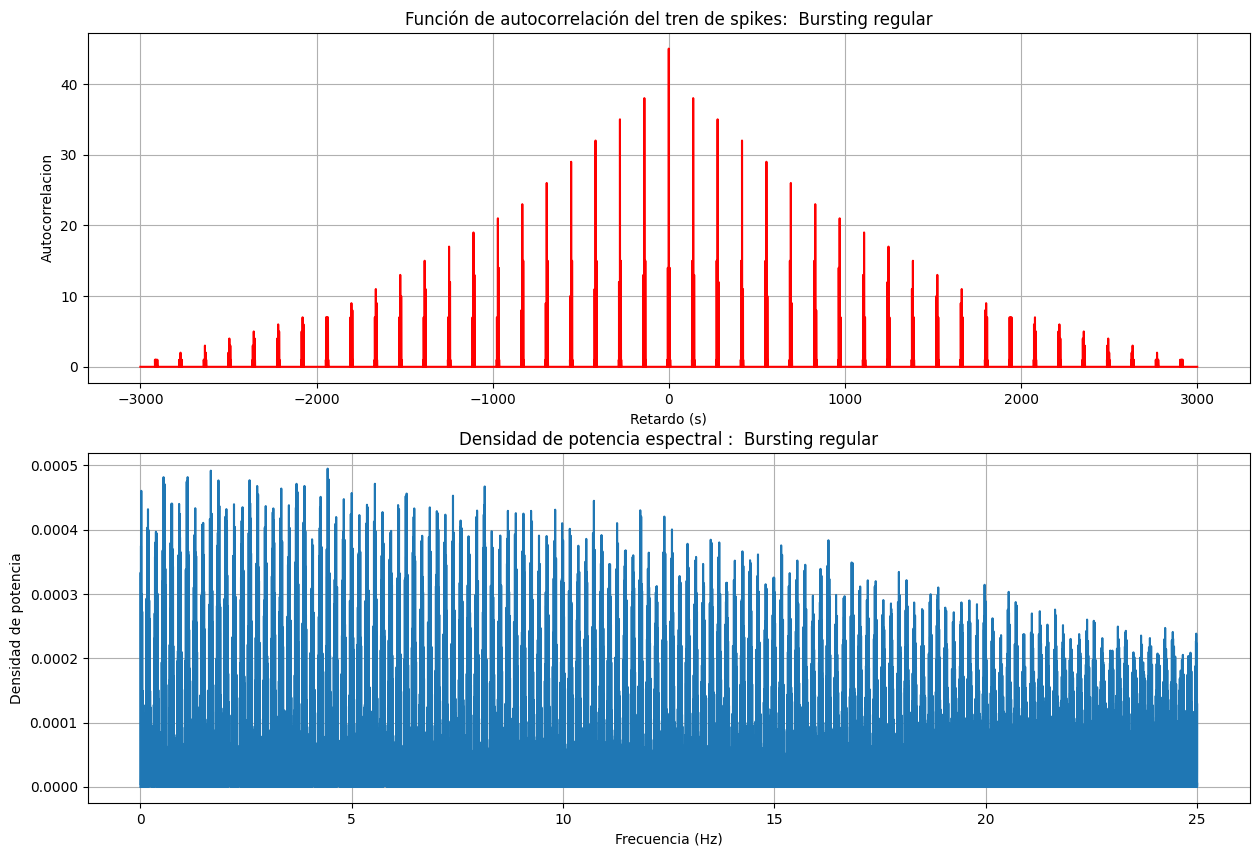

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(np.arange(-len(peaks_01b) + 1, len(peaks_01b)) * 0.02, correlacionb , color='red')

plt.title('Función de autocorrelación del tren de spikes:  Bursting regular')
plt.xlabel('Retardo (s)')
plt.ylabel('Autocorrelacion')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f, Pxxb)
plt.title('Densidad de potencia espectral :  Bursting regular')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia')

plt.grid()

In [ ]:
#Burst Inicial:  τm=7.22 ,  a=4 ,  b=120 ,  τw=150 ,  R=1/18 ,  Vrest=−58 ,  Vreset=−50 ,  I=400

tau_mc = 7.22
ac = 4
bc = 120
tau_wc = 150
Rc = 1/18
V_restc = -58
V_resetc = -50
Ic = 400
tf = 3000

Vc,Wc,tc,spike_timesc = adex(tau_mc, ac, bc, tau_wc, Rc, V_restc, V_resetc, Ic, tf)
isic = np.diff(np.array(spike_timesc))
peaks_01c = peaks_01_ADEX(spike_timesc,tf)
bins_uso = np.arange(0,tf,0.02)
correlacionc = np.correlate(peaks_01c, peaks_01c, mode = 'full')
f , Pxxc= periodogram(peaks_01c, fs = 1/0.02)


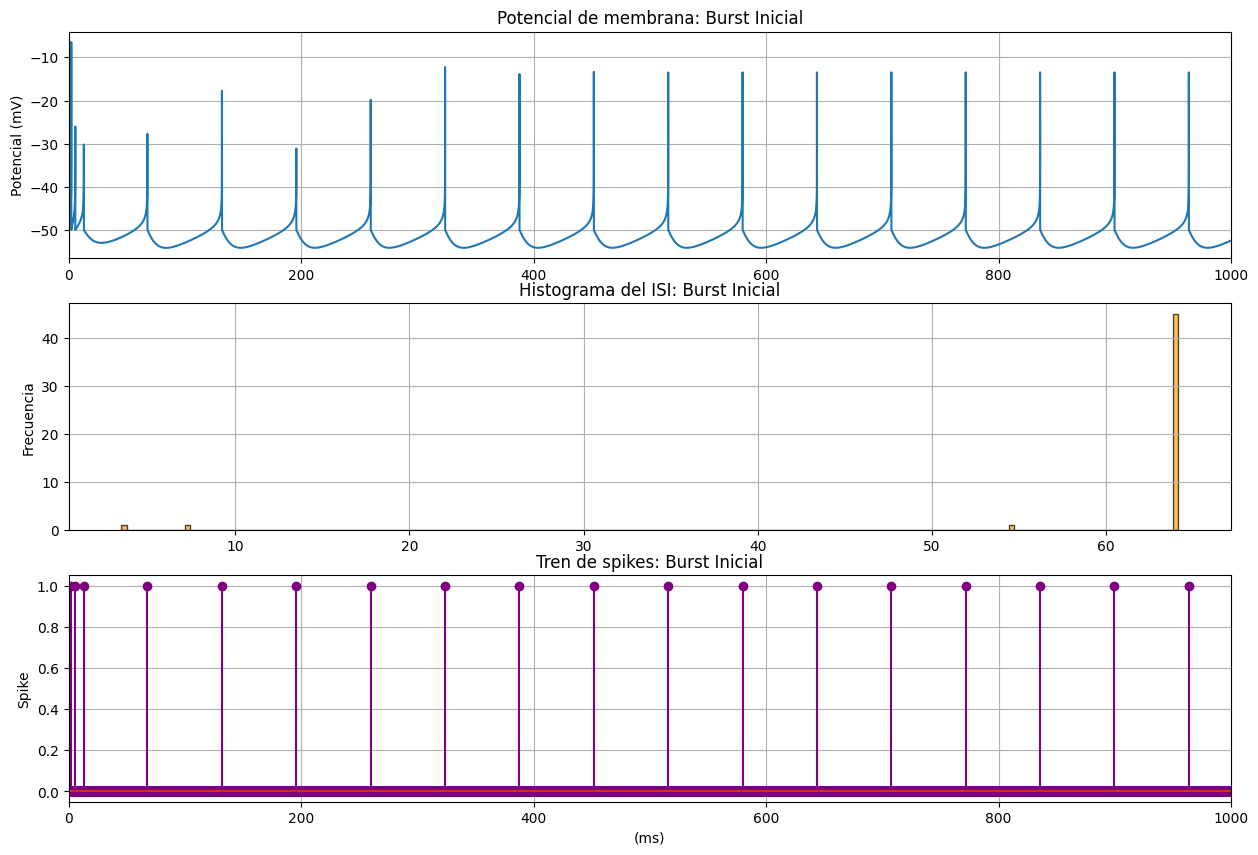

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(3,1,1)
plt.plot(tc,Vc)
plt.xlim(0,1000)

plt.title('Potencial de membrana: Burst Inicial')
plt.ylabel('Potencial (mV)')

plt.grid()

plt.subplot(3,1,2)
plt.hist(isic, bins=200, color='orange', alpha=0.7,edgecolor='black')

plt.title('Histograma del ISI: Burst Inicial')

plt.ylabel('Frecuencia')
plt.grid()

plt.subplot(3,1,3)
plt.stem(bins_uso,peaks_01c, 'purple')

plt.title('Tren de spikes: Burst Inicial')
plt.ylabel('Spike')
plt.xlabel('(ms)')
plt.xlim(0,1000)
plt.grid()
plt.show()


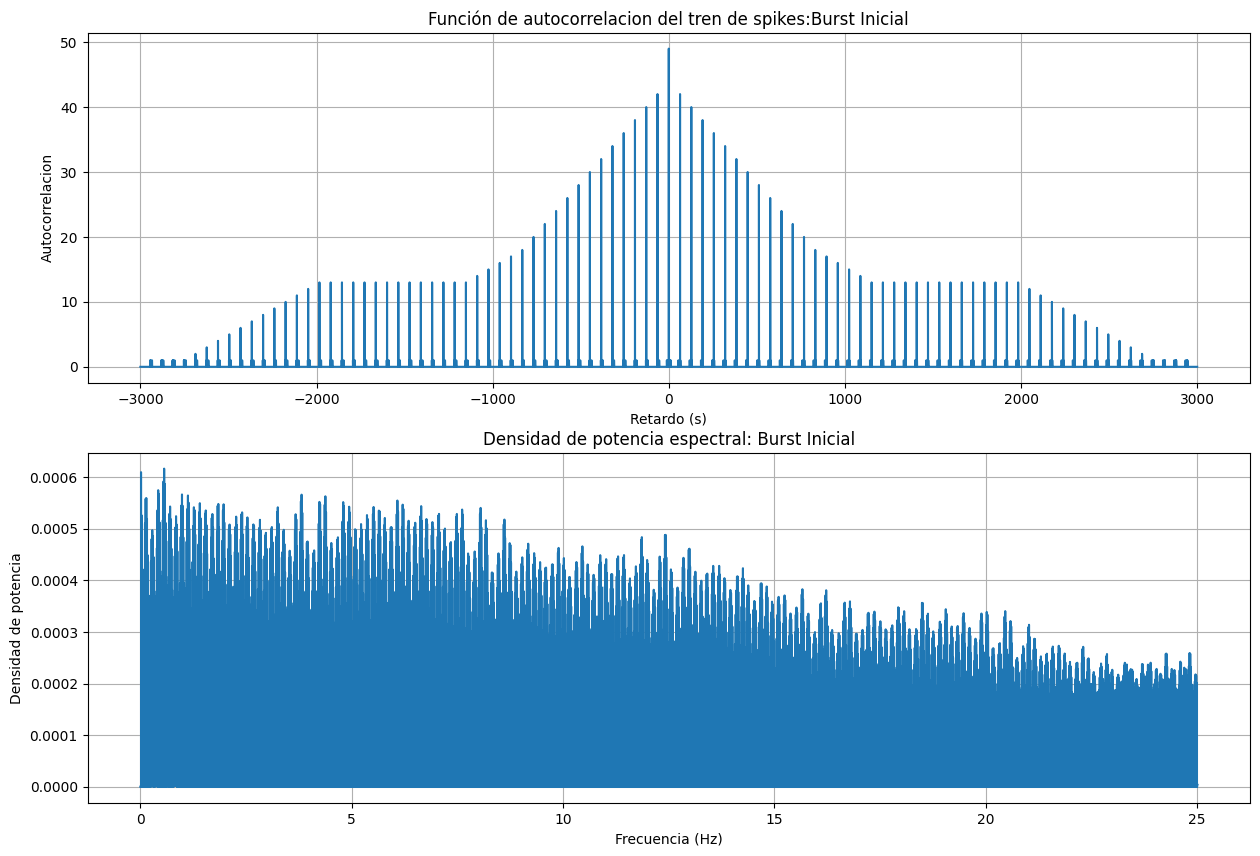

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(np.arange(-len(peaks_01c) + 1, len(peaks_01c)) * 0.02, correlacionc)
plt.title('Función de autocorrelacion del tren de spikes:Burst Inicial')
plt.xlabel('Retardo (s)')
plt.ylabel('Autocorrelacion')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f, Pxxc)
plt.title('Densidad de potencia espectral: Burst Inicial')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia')
plt.grid()

In [ ]:
#Irregular:  τm=8.33 ,  a=−11 ,  b=30 ,  τw=130 ,  R=1/12 ,  Vrest=−60 ,  Vreset=−48 ,  I=160

tau_md = 8.33
ad =  -11
bd = 30
tau_wd = 130
Rd = 1/12
V_restd = -60
V_resetd = -48
Id = 160
tf = 3000

Vd,Wd,td,spike_timed = adex(tau_md, ad, bd, tau_wd, Rd, V_restd, V_resetd, Id, tf)
isid = np.diff(np.array(spike_timed))
peaks_01d = peaks_01_ADEX(spike_timed,tf)
bins_uso = np.arange(0,tf,0.02)
correlaciond = np.correlate(peaks_01d, peaks_01d, mode = 'full')
f , Pxxd= periodogram(peaks_01d, fs = 1/0.02)



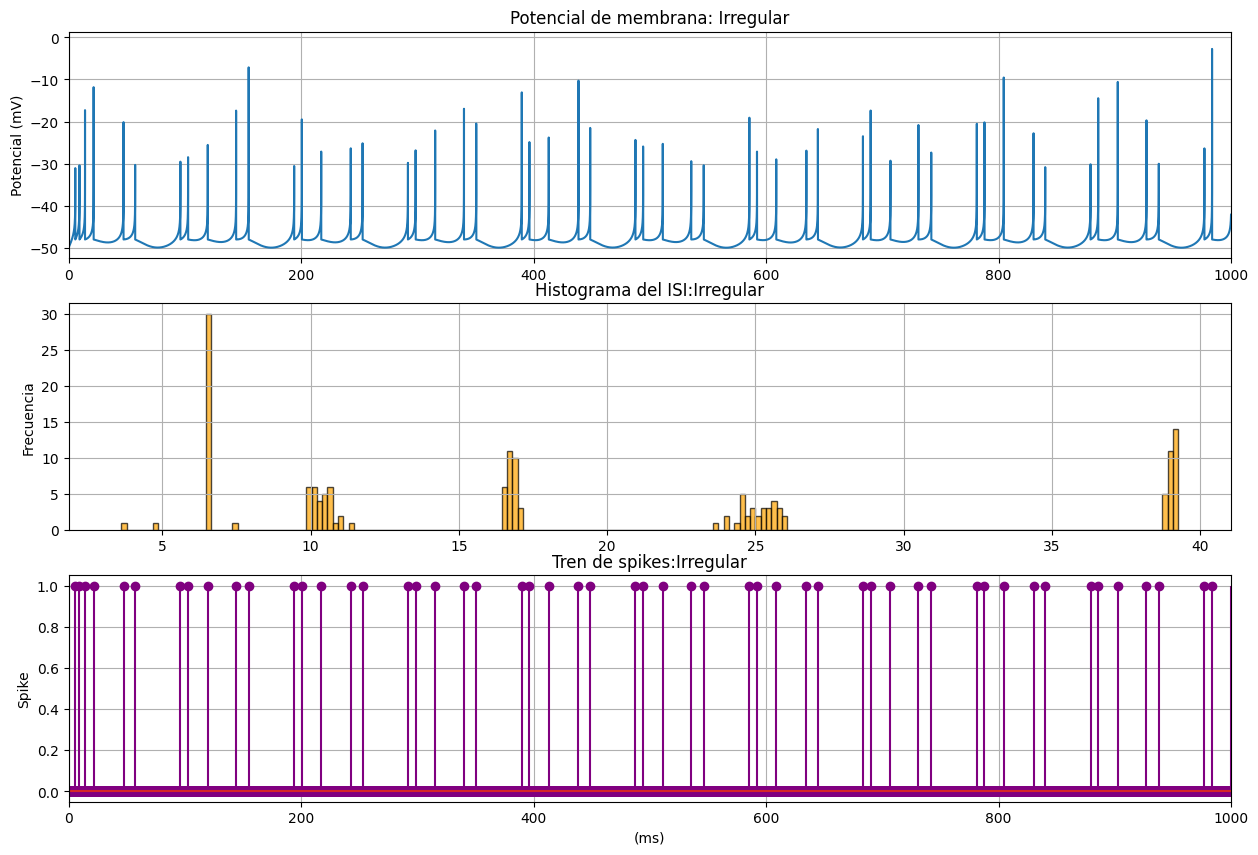

In [ ]:
plt.figure(figsize = (15, 10))

plt.subplot(3,1,1)

plt.plot(td,Vd)
plt.xlim(0,1000)
plt.title('Potencial de membrana: Irregular')
plt.ylabel('Potencial (mV)')
plt.grid()

plt.subplot(3,1,2)

plt.hist(isid, bins=200, color='orange', alpha=0.7,edgecolor='black')
plt.title('Histograma del ISI:Irregular')
plt.ylabel('Frecuencia')
plt.grid()

plt.subplot(3,1,3)

plt.stem(bins_uso,peaks_01d, 'purple')
plt.title('Tren de spikes:Irregular')
plt.ylabel('Spike')
plt.xlabel('(ms)')
plt.xlim(0,1000)
plt.grid()
plt.show()


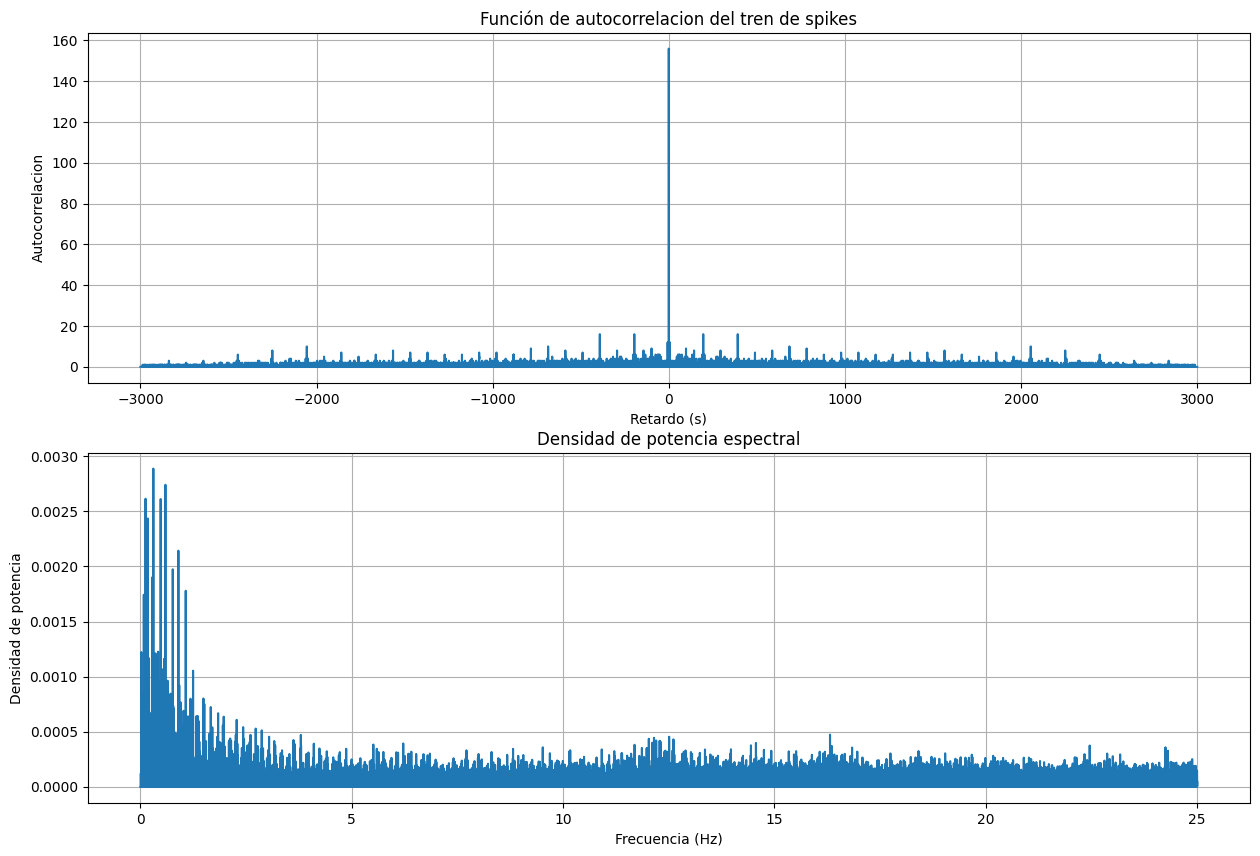

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(np.arange(-len(peaks_01d) + 1, len(peaks_01d)) * 0.02, correlaciond)
plt.title('Función de autocorrelacion del tren de spikes')
plt.xlabel('Retardo (s)')
plt.ylabel('Autocorrelacion')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f, Pxxd)
plt.title('Densidad de potencia espectral')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia')
plt.grid()
